# Attention
Code was changed.

Original provided by the author in GitHub: https://github.com/ageron/handson-ml/blob/9798a68ded892679957b8a1303ea0b7d0f75fe92/04_training_linear_models.ipynb from the exceptional book: Hands on Machine Learning with Scikit-Learn and TensorFlow by Aurelien Geron, OReilly 2017, ISBN: 9781491962299

In [1]:
# Imports
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

iris = datasets.load_iris()

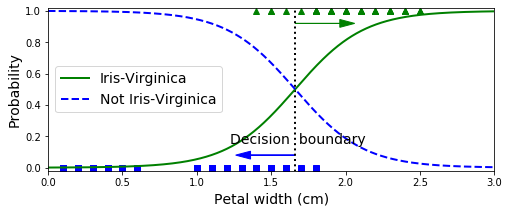

In [2]:
# 1. Only Petal Width

# Extract Data
X = iris["data"][:, 3:]  # petal width array([[0.2],[0.4],[0.3],[0.1],...])
y = (iris["target"] == 2).astype(np.int)  # array of 1 if Iris-Virginica, else 0

# Train Logistic Regression Model
log_reg = LogisticRegression()
log_reg.fit(X, y)

# Create Propabilities for Petal Width between 0 and 3mm
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

# Plot Propabilities
plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")

plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")

plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

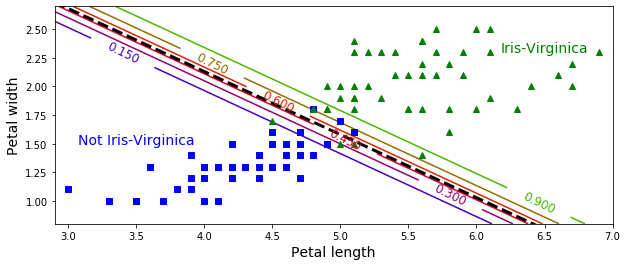

In [3]:
# 2. Petal Length and Petal Width

# Extract Data
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

# Train Logistic Regression Model
log_reg = LogisticRegression(C=10**10, random_state=42)
log_reg.fit(X, y)

# Create Propabilities for Petal Width between 0 and 3mm and Petal Length between 0.8 and 2.7mm
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)

# Plot Propabilities
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris-Virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris-Virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

In [4]:
# 3. Propabilities in regard to every Feature alone and together

print(list(iris["feature_names"]))

# Setup
columns = [0, 1, 2, 3, (0,1,2,3)]
y = (iris["target"] == 2).astype(np.int)

prediction_input = [[[4.8]],[[2.5]],[[5.3]],[[2.4]],[[4.8,2.5,5.3,2.4]]]
predictions_output = np.array([])

for i in range(5):
    if isinstance(columns[i], (tuple)):
        X = iris["data"][:, columns[i]]
    else:
        X = iris["data"][:, columns[i]].reshape(-1, 1)

    reg = LogisticRegression()
    reg.fit(X, y)
    predictions_output = np.append(predictions_output, reg.predict(prediction_input[i])[0])

# Output
print(predictions_output)
print("Prediction regarding all Features: " + str(predictions_output[4]) + " -> It is an Iris Virginica!")

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0. 0. 1. 1. 1.]
Prediction regarding all Features: 1.0 -> It is an Iris Virginica!
